In [3]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import random
seed = 42

# Python built-in random module
random.seed(seed)

# NumPy
np.random.seed(seed)

# PyTorch
torch.manual_seed(seed)

import numpy as np
from scipy.stats import norm, multivariate_normal, gaussian_kde
from scipy.integrate import nquad
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

from mixture_lower import *
from value_estimator import *
from guided_models import *

ModuleNotFoundError: No module named 'numpy'

In [92]:
B = 4
def reward_func(x, means, var, goodmeans, r = 1): #assumes all mixtures have same covariance matrix
    return r*(x[0] < -7.5)
def reward_func_vectorized(x, means = None, var = None, goodmeans = None, r=1):
    return r * (x[..., 0] < -7.5)

In [108]:
t_vals = np.arange(1, n+1)
c, delta = 4, 0.02
inner = delta * (1 + c * np.log(n) / n)**t_vals
alpha_t = 1 - (c * np.log(n) / n) * np.minimum(inner, 1)
alpha_t[0] = 1 - delta

array([0.98      , 0.96935642, 0.95099643, 0.92163612, 0.87468467,
       0.79960244, 0.67953495, 0.48752946, 0.40085355, 0.40085355,
       0.40085355, 0.40085355, 0.40085355, 0.40085355, 0.40085355,
       0.40085355, 0.40085355, 0.40085355, 0.40085355, 0.40085355])

In [ ]:
# Monte Carlo parameters
num_trials =5 # Number of Monte Carlo trials
n_epochs = 100


# First loop: Train and store val_ensembles and reward_ests
val_ensembles = []
reward_ests = []

for trial in range(1):
    print(f"Training Trial {trial + 1}/{num_trials}")

    # Fix random seed for reproducibility
    np.random.seed(trial)  # Use trial index as seed

    # Initialize random mixture means in [-1,1]^d
    mu_0 = np.array([[5, 0], [-5, 0]])

    # Shared covariance matrix
    var_0 = np.eye(d)

    # Mixture weights (normalized)
    pi_0 = np.array([0.95, 0.05])
    pi_0 /= np.sum(pi_0)

    # Initialize diffusion process
    dist0 = Mixture(mu_0, var_0, pi_0)
    diffusion = Diffusion(dist0, alpha_t, Nkern)

    # Generate samples
    X = diffusion.calc_samples()
    expr = np.exp([reward_func(x, mu_0, var_0, [1], B) for x in X[:, -1, :]])

    # Train value ensemble
    val_ensemble = ValueEnsemble(X, expr, [128, 128, 64])
    val_ensemble.train(epochs=n_epochs, verbose=False)
    val_ensembles.append(val_ensemble)

    # Train reward estimator
    reward_est = RewardEstimator(X, expr, [128, 128, 64])
    reward_est.train(epochs=n_epochs, verbose=False)
    reward_ests.append(reward_est)

val_ensembles = val_ensembles + [val_ensembles[0]]*(num_trials-1)
reward_ests = reward_ests + [reward_ests[0]]*(num_trials-1)

# Second loop: Roll out trajectories using trained ensembles


Training Trial 1/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:05<00:00,  3.28it/s]



[Net 0 | Epoch 01] avg MSE = 368.1694
[Net 0 | Epoch 02] avg MSE = 348.6879
[Net 0 | Epoch 03] avg MSE = 348.2164
[Net 0 | Epoch 04] avg MSE = 347.6523
[Net 0 | Epoch 05] avg MSE = 347.8419
[Net 0 | Epoch 06] avg MSE = 347.5342
[Net 0 | Epoch 07] avg MSE = 347.5148
[Net 0 | Epoch 04] avg MSE = 347.6523
[Net 0 | Epoch 05] avg MSE = 347.8419
[Net 0 | Epoch 06] avg MSE = 347.5342
[Net 0 | Epoch 07] avg MSE = 347.5148
[Net 0 | Epoch 08] avg MSE = 347.0394
[Net 0 | Epoch 09] avg MSE = 347.4173
[Net 0 | Epoch 10] avg MSE = 347.2486
[Net 0 | Epoch 11] avg MSE = 347.0854
[Net 0 | Epoch 08] avg MSE = 347.0394
[Net 0 | Epoch 09] avg MSE = 347.4173
[Net 0 | Epoch 10] avg MSE = 347.2486
[Net 0 | Epoch 11] avg MSE = 347.0854
[Net 0 | Epoch 12] avg MSE = 347.0543
[Net 0 | Epoch 13] avg MSE = 347.1716
[Net 0 | Epoch 14] avg MSE = 347.2805
[Net 0 | Epoch 15] avg MSE = 347.1579
[Net 0 | Epoch 12] avg MSE = 347.0543
[Net 0 | Epoch 13] avg MSE = 347.1716
[Net 0 | Epoch 14] avg MSE = 347.2805
[Net 0 | Epo

Reverse Diffusion Progress: 100%|██████████| 19/19 [00:05<00:00,  3.26it/s]



[Net 0 | Epoch 01] avg MSE = 372.7099
[Net 0 | Epoch 02] avg MSE = 348.5820
[Net 0 | Epoch 03] avg MSE = 348.0822
[Net 0 | Epoch 04] avg MSE = 347.8318
[Net 0 | Epoch 05] avg MSE = 347.5504
[Net 0 | Epoch 06] avg MSE = 347.4713
[Net 0 | Epoch 07] avg MSE = 347.6541
[Net 0 | Epoch 08] avg MSE = 347.5690
[Net 0 | Epoch 05] avg MSE = 347.5504
[Net 0 | Epoch 06] avg MSE = 347.4713
[Net 0 | Epoch 07] avg MSE = 347.6541
[Net 0 | Epoch 08] avg MSE = 347.5690
[Net 0 | Epoch 09] avg MSE = 347.5342
[Net 0 | Epoch 10] avg MSE = 347.5695
[Net 0 | Epoch 11] avg MSE = 347.2895
[Net 0 | Epoch 12] avg MSE = 347.4738
[Net 0 | Epoch 09] avg MSE = 347.5342
[Net 0 | Epoch 10] avg MSE = 347.5695
[Net 0 | Epoch 11] avg MSE = 347.2895
[Net 0 | Epoch 12] avg MSE = 347.4738
[Net 0 | Epoch 13] avg MSE = 347.5310
[Net 0 | Epoch 14] avg MSE = 347.3592
[Net 0 | Epoch 15] avg MSE = 347.3513
[Net 0 | Epoch 16] avg MSE = 347.4280
[Net 0 | Epoch 13] avg MSE = 347.5310
[Net 0 | Epoch 14] avg MSE = 347.3592
[Net 0 | Epo

Reverse Diffusion Progress: 100%|██████████| 19/19 [00:05<00:00,  3.25it/s]



[Net 0 | Epoch 01] avg MSE = 358.0417
[Net 0 | Epoch 02] avg MSE = 337.0551
[Net 0 | Epoch 03] avg MSE = 336.4876
[Net 0 | Epoch 04] avg MSE = 336.2158
[Net 0 | Epoch 05] avg MSE = 335.9912
[Net 0 | Epoch 06] avg MSE = 335.7628
[Net 0 | Epoch 07] avg MSE = 335.5731
[Net 0 | Epoch 04] avg MSE = 336.2158
[Net 0 | Epoch 05] avg MSE = 335.9912
[Net 0 | Epoch 06] avg MSE = 335.7628
[Net 0 | Epoch 07] avg MSE = 335.5731
[Net 0 | Epoch 08] avg MSE = 335.6609
[Net 0 | Epoch 09] avg MSE = 335.7154
[Net 0 | Epoch 10] avg MSE = 335.7657
[Net 0 | Epoch 11] avg MSE = 335.6178
[Net 0 | Epoch 08] avg MSE = 335.6609
[Net 0 | Epoch 09] avg MSE = 335.7154
[Net 0 | Epoch 10] avg MSE = 335.7657
[Net 0 | Epoch 11] avg MSE = 335.6178
[Net 0 | Epoch 12] avg MSE = 335.4665
[Net 0 | Epoch 13] avg MSE = 335.5444
[Net 0 | Epoch 14] avg MSE = 335.5975
[Net 0 | Epoch 15] avg MSE = 335.5337
[Net 0 | Epoch 12] avg MSE = 335.4665
[Net 0 | Epoch 13] avg MSE = 335.5444
[Net 0 | Epoch 14] avg MSE = 335.5975
[Net 0 | Epo

Reverse Diffusion Progress: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]



[Net 0 | Epoch 01] avg MSE = 363.8503
[Net 0 | Epoch 02] avg MSE = 345.5527
[Net 0 | Epoch 03] avg MSE = 344.7850
[Net 0 | Epoch 04] avg MSE = 344.8355
[Net 0 | Epoch 05] avg MSE = 344.3120
[Net 0 | Epoch 06] avg MSE = 344.5321
[Net 0 | Epoch 07] avg MSE = 344.6792
[Net 0 | Epoch 04] avg MSE = 344.8355
[Net 0 | Epoch 05] avg MSE = 344.3120
[Net 0 | Epoch 06] avg MSE = 344.5321
[Net 0 | Epoch 07] avg MSE = 344.6792
[Net 0 | Epoch 08] avg MSE = 344.8675
[Net 0 | Epoch 09] avg MSE = 344.4650
[Net 0 | Epoch 10] avg MSE = 344.5394
[Net 0 | Epoch 11] avg MSE = 344.2967
[Net 0 | Epoch 08] avg MSE = 344.8675
[Net 0 | Epoch 09] avg MSE = 344.4650
[Net 0 | Epoch 10] avg MSE = 344.5394
[Net 0 | Epoch 11] avg MSE = 344.2967
[Net 0 | Epoch 12] avg MSE = 344.5770
[Net 0 | Epoch 13] avg MSE = 344.5188
[Net 0 | Epoch 14] avg MSE = 344.3823
[Net 0 | Epoch 15] avg MSE = 344.5819
[Net 0 | Epoch 12] avg MSE = 344.5770
[Net 0 | Epoch 13] avg MSE = 344.5188
[Net 0 | Epoch 14] avg MSE = 344.3823
[Net 0 | Epo

Reverse Diffusion Progress: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]



[Net 0 | Epoch 01] avg MSE = 378.9947
[Net 0 | Epoch 02] avg MSE = 359.0051
[Net 0 | Epoch 03] avg MSE = 358.8342
[Net 0 | Epoch 04] avg MSE = 358.6106
[Net 0 | Epoch 05] avg MSE = 358.4838
[Net 0 | Epoch 06] avg MSE = 358.4409
[Net 0 | Epoch 07] avg MSE = 358.4265
[Net 0 | Epoch 04] avg MSE = 358.6106
[Net 0 | Epoch 05] avg MSE = 358.4838
[Net 0 | Epoch 06] avg MSE = 358.4409
[Net 0 | Epoch 07] avg MSE = 358.4265
[Net 0 | Epoch 08] avg MSE = 358.4706
[Net 0 | Epoch 09] avg MSE = 358.4535
[Net 0 | Epoch 10] avg MSE = 358.4612
[Net 0 | Epoch 08] avg MSE = 358.4706
[Net 0 | Epoch 09] avg MSE = 358.4535
[Net 0 | Epoch 10] avg MSE = 358.4612
[Net 0 | Epoch 11] avg MSE = 358.7403
[Net 0 | Epoch 12] avg MSE = 358.1148
[Net 0 | Epoch 13] avg MSE = 358.3495
[Net 0 | Epoch 11] avg MSE = 358.7403
[Net 0 | Epoch 12] avg MSE = 358.1148
[Net 0 | Epoch 13] avg MSE = 358.3495
[Net 0 | Epoch 14] avg MSE = 358.5881
[Net 0 | Epoch 15] avg MSE = 358.0697
[Net 0 | Epoch 16] avg MSE = 358.1631
[Net 0 | Epo

In [71]:
guided_steps_per = []  # Store guided.num_steps for each trial
guided_steps_mixed = []
guided_steps_last = []  # Store guided.num_steps for each trial

X_mixed = np.zeros((0, 2))
X_per = np.zeros((0,  2))
X_last = np.zeros((0, 2))

for trial in range(num_trials):
    print(f"Rolling out Trial {trial + 1}/{num_trials}")

    val_ensemble = val_ensembles[trial]
    reward_est = reward_ests[trial]

    # Perform per-step guided diffusion
    guided_per = GuidedDiffusion(dist0, alpha_t, lambda x, t: np.squeeze(np.log(np.clip(val_ensemble.predict(x, t), np.e**(-B), np.e**B)), axis=2), upper_bound=B, temperature=1, S=200)
    X_guided_per = guided_per.calc_samples()

    def eval(x, t):
        o = np.log(np.clip(val_ensemble.predict(x, t), np.e**(-B), np.e**B))
        if o.ndim > 1:
            return np.squeeze(o, axis=2)
        else:
            return np.squeeze(o)
    guided_mixed = MixedGuidance(dist0, alpha_t, eval, 10, upper_bound=B, temperature=1, S=200)
    X_guided_mixed = guided_mixed.calc_samples()

    # Perform last-step guided diffusion
    guided_last = LastStepDiffusion(dist0, alpha_t, lambda x: np.log(np.clip(reward_est.predict(x), np.e**(-B), np.e**B)), upper_bound=B, temperature=1, S=200)
    X_guided_last = guided_last.calc_samples()

    guided_true = LastStepDiffusion(dist0, alpha_t, lambda x: np.log(np.clip(reward_func_vectorized(x, mu_0, var_0, [1], B), np.e**(-B), np.e**B)), upper_bound=B, temperature=1, S=200)

    # Concatenate results
    X_per = np.concatenate((X_per, X_guided_per[:, -1, :]), axis=0)
    X_mixed = np.concatenate((X_mixed, X_guided_mixed[:, -1, :]), axis=0)
    X_last = np.concatenate((X_last, X_guided_last[:, -1, :]), axis=0)

    # Record the number of steps
    guided_steps_per.append(guided_per.num_steps)
    guided_steps_last.append(guided_last.num_steps)
    guided_steps_mixed.append(guided_mixed.num_steps)


Rolling out Trial 1/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:17<00:00,  1.10it/s]
Phase 1 Trajectories: 220it [00:00, 863.90it/s]                         


final_samples (200, 10, 2)
ayayay (200, 10, 2)


Phase 2 guided rollout: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]
Generating Trajectories: 208it [00:00, 265.91it/s]                         


Rolling out Trial 2/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:17<00:00,  1.09it/s]
Phase 1 Trajectories: 247it [00:00, 970.58it/s]                         


final_samples (200, 10, 2)
ayayay (200, 10, 2)


Phase 2 guided rollout: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]
Generating Trajectories: 217it [00:00, 258.64it/s]                         


Rolling out Trial 3/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:17<00:00,  1.09it/s]
Phase 1 Trajectories: 208it [00:00, 789.82it/s]                         


final_samples (200, 10, 2)
ayayay (200, 10, 2)


Phase 2 guided rollout: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]
Generating Trajectories: 215it [00:00, 251.10it/s]                         


Rolling out Trial 4/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:17<00:00,  1.10it/s]
Phase 1 Trajectories: 229it [00:00, 746.46it/s]                         


final_samples (200, 10, 2)
ayayay (200, 10, 2)


Phase 2 guided rollout: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]
Generating Trajectories: 206it [00:00, 245.94it/s]                         


Rolling out Trial 5/5


Reverse Diffusion Progress: 100%|██████████| 19/19 [00:17<00:00,  1.10it/s]
Phase 1 Trajectories: 222it [00:00, 858.62it/s]                         


final_samples (200, 10, 2)
ayayay (200, 10, 2)


Phase 2 guided rollout: 100%|██████████| 11/11 [00:10<00:00,  1.06it/s]
Generating Trajectories: 215it [00:00, 289.13it/s]                         


In [106]:
guided_steps_mixed

[33794, 34037, 36714, 32962, 31532]

In [75]:
# Compute Monte Carlo estimate
mean_steps_per = np.mean(guided_steps_per)
std_steps_per = np.std(guided_steps_per)

mean_steps_last = np.mean(guided_steps_last)
std_steps_last = np.std(guided_steps_last)

mean_steps_mixed = np.mean(guided_steps_mixed)
std_steps_mixed = np.std(guided_steps_mixed)

In [76]:
print(f"Monte Carlo estimate of guided.num_steps (per-step): {mean_steps_per:.2f} ± {std_steps_per:.2f} (std dev)")
print(f"Monte Carlo estimate of guided.num_steps (mixed): {mean_steps_mixed:.2f} ± {std_steps_mixed:.2f} (std dev)")
print(f"Monte Carlo estimate of guided.num_steps (last-step): {mean_steps_last:.2f} ± {std_steps_last:.2f} (std dev)")

Monte Carlo estimate of guided.num_steps (per-step): 23069.80 ± 2643.18 (std dev)
Monte Carlo estimate of guided.num_steps (mixed): 33807.80 ± 1696.67 (std dev)
Monte Carlo estimate of guided.num_steps (last-step): 29545.80 ± 1514.75 (std dev)


In [93]:
true = LastStepDiffusion(dist0, alpha_t, lambda x: reward_func_vectorized(x, r = 4), upper_bound=B, temperature=1, S = num_trials*200)
X_true = true.calc_samples()
X_true = X_true[:, -1, :]

Generating Trajectories: 1026it [00:20, 50.53it/s]                         
Generating Trajectories: 1026it [00:20, 50.53it/s]                         


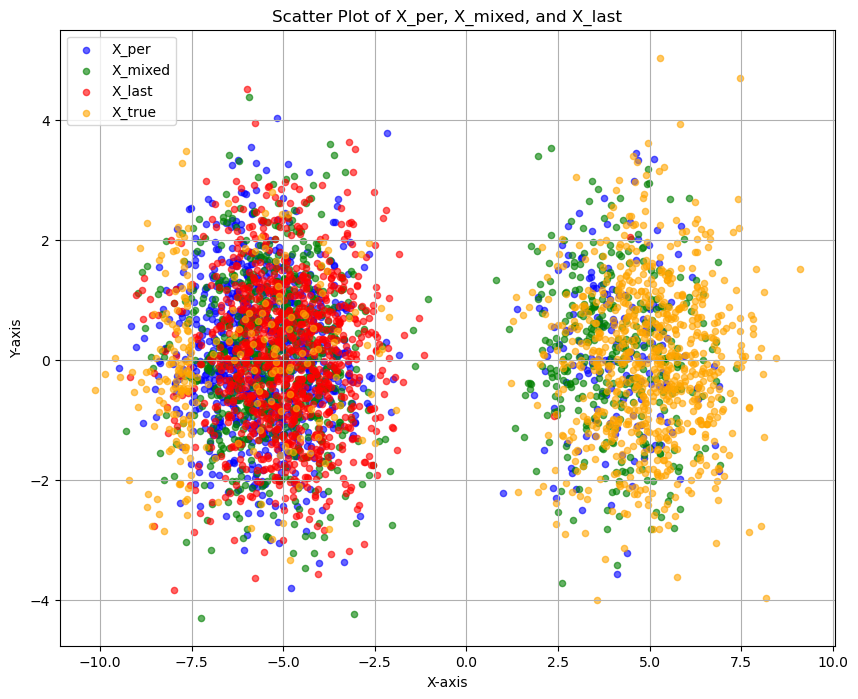

In [94]:
plt.figure(figsize=(10, 8))

# Scatter plot for X_per
plt.scatter(X_per[:, 0], X_per[:, 1], label='X_per', alpha=0.6, s=20, c='blue')

# Scatter plot for X_mixed
plt.scatter(X_mixed[:, 0], X_mixed[:, 1], label='X_mixed', alpha=0.6, s=20, c='green')

# Scatter plot for X_last
plt.scatter(X_last[:, 0], X_last[:, 1], label='X_last', alpha=0.6, s=20, c='red')

# Scatter plot for X_true 
plt.scatter(X_true[:, 0], X_true[:, 1], label='X_true', alpha=0.6, s=20, c='orange')


# Add labels, legend, and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X_per, X_mixed, and X_last')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

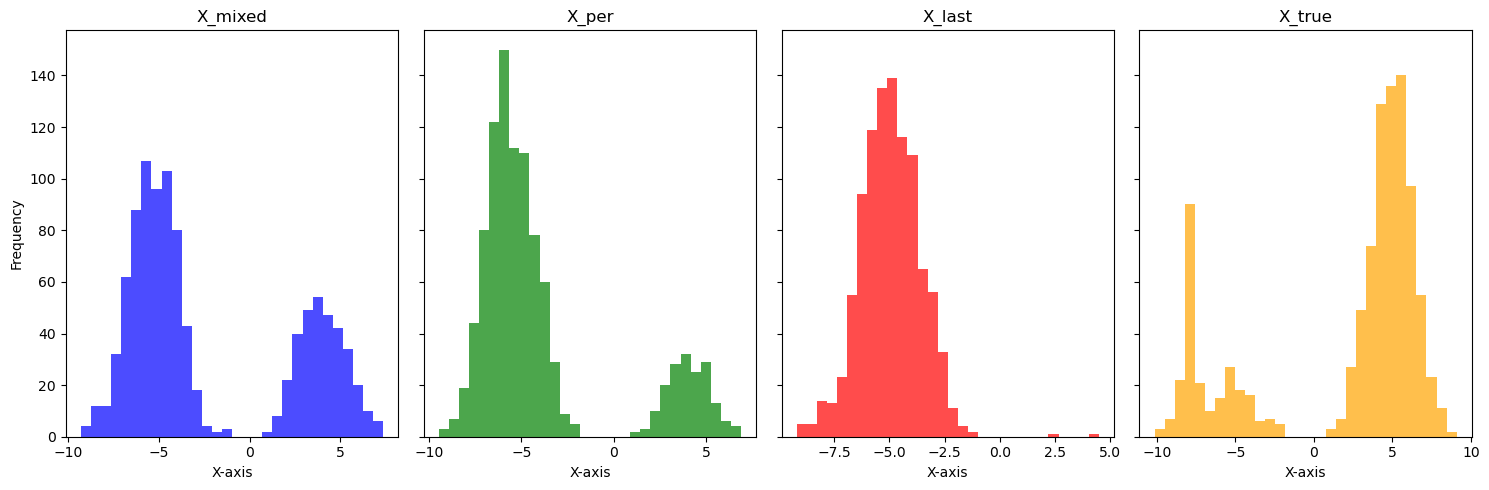

In [99]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

# Histogram for X_mixed
axes[0].hist(X_mixed[:, 0], bins=30, color='blue', alpha=0.7)
axes[0].set_title('X_mixed')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Frequency')

# Histogram for X_per
axes[1].hist(X_per[:, 0], bins=30, color='green', alpha=0.7)
axes[1].set_title('X_per')
axes[1].set_xlabel('X-axis')

# Histogram for X_last
axes[2].hist(X_last[:, 0], bins=30, color='red', alpha=0.7)
axes[2].set_title('X_last')
axes[2].set_xlabel('X-axis')

axes[3].hist(X_true[:, 0], bins=30, color='orange', alpha=0.7)
axes[3].set_title('X_true')
axes[3].set_xlabel('X-axis')



plt.tight_layout()
plt.show()

Approximate KL divergence (X_per || X_true): 1.1355 ± 1.1153
Approximate KL divergence (X_mixed || X_true): 0.7050 ± 1.0140
Approximate KL divergence (X_last || X_true): 2.0222 ± 0.6836


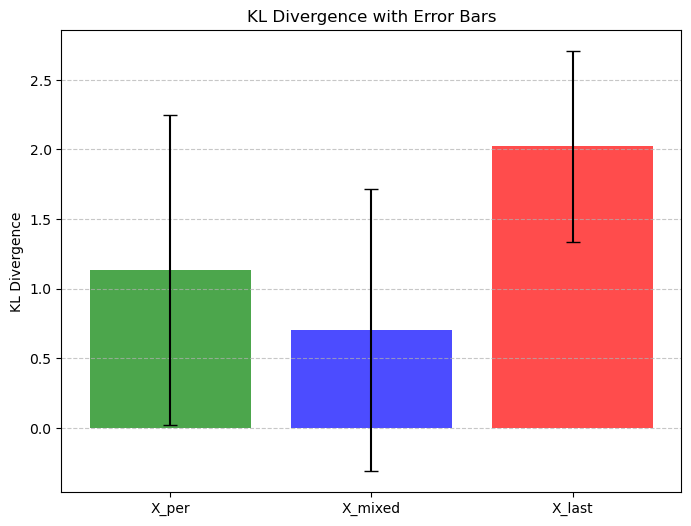

In [101]:
# Calculate KL divergence and standard deviation for X_per
p_kde_per = gaussian_kde(X_per.T)
q_kde = gaussian_kde(X_true.T)

p_vals_per = p_kde_per(X_per.T)
q_vals_per = q_kde(X_per.T)
kl_div_per = np.mean(np.log(p_vals_per / q_vals_per))
std_kl_div_per = np.std(np.log(p_vals_per / q_vals_per))
print(f"Approximate KL divergence (X_per || X_true): {kl_div_per:.4f} ± {std_kl_div_per:.4f}")

# Calculate KL divergence and standard deviation for X_mixed
p_kde_mixed = gaussian_kde(X_mixed.T)
p_vals_mixed = p_kde_mixed(X_mixed.T)
q_vals_mixed = q_kde(X_mixed.T)
kl_div_mixed = np.mean(np.log(p_vals_mixed / q_vals_mixed))
std_kl_div_mixed = np.std(np.log(p_vals_mixed / q_vals_mixed))
print(f"Approximate KL divergence (X_mixed || X_true): {kl_div_mixed:.4f} ± {std_kl_div_mixed:.4f}")

# Calculate KL divergence and standard deviation for X_last
p_kde_last = gaussian_kde(X_last.T)
p_vals_last = p_kde_last(X_last.T)
q_vals_last = q_kde(X_last.T)
kl_div_last = np.mean(np.log(p_vals_last / q_vals_last))
std_kl_div_last = np.std(np.log(p_vals_last / q_vals_last))
print(f"Approximate KL divergence (X_last || X_true): {kl_div_last:.4f} ± {std_kl_div_last:.4f}")

# Plot the KL divergence with error bars
kl_divs = [kl_div_per, kl_div_mixed, kl_div_last]
std_kl_divs = [std_kl_div_per, std_kl_div_mixed, std_kl_div_last]
labels = ['X_per', 'X_mixed', 'X_last']

plt.figure(figsize=(8, 6))
plt.bar(labels, kl_divs, yerr=std_kl_divs, capsize=5, color=['green', 'blue', 'red'], alpha=0.7)
plt.ylabel('KL Divergence')
plt.title('KL Divergence with Error Bars')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [105]:
kde_per = gaussian_kde(X_per.T)
kde_mixed = gaussian_kde(X_mixed.T)
kde_last = gaussian_kde(X_last.T)
kde_true = gaussian_kde(X_true.T)

# Define a grid for evaluation
grid_x, grid_y = np.meshgrid(
    np.linspace(-15, 15, 100),
    np.linspace(-15, 15, 100)
)
grid_points = np.vstack([grid_x.ravel(), grid_y.ravel()])

# Evaluate the PDFs on the grid
pdf_per = kde_per(grid_points)
pdf_mixed = kde_mixed(grid_points)
pdf_last = kde_last(grid_points)
pdf_true = kde_true(grid_points)

# Compute total variation distances
tv_per = 0.5 * np.sum(np.abs(pdf_per - pdf_true)) * (30 / 100) ** 2
tv_mixed = 0.5 * np.sum(np.abs(pdf_mixed - pdf_true)) * (30 / 100) ** 2
tv_last = 0.5 * np.sum(np.abs(pdf_last - pdf_true)) * (30 / 100) ** 2

print(f"Total Variation (X_per, X_true): {tv_per:.4f}")
print(f"Total Variation (X_mixed, X_true): {tv_mixed:.4f}")
print(f"Total Variation (X_last, X_true): {tv_last:.4f}")

Total Variation (X_per, X_true): 0.5908
Total Variation (X_mixed, X_true): 0.4334
Total Variation (X_last, X_true): 0.7985
